In [1]:
from pf_sim import PFSimulation
from filters.particle_filter import ParticleFilter
from likelihoods.poisson import PoissonLikelihood
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pf_sim = PFSimulation(
                 filter_class= ParticleFilter,
                 likelihood_fn= PoissonLikelihood,
                 ipm= 'seir',
                 data= 'D:/Sachin/New_EpiMorph/Epymorph/epymorph/calvetti_sim_data_protocol_A.csv',
                 num_particles= 100,
                 num_popolation= 100_000,
                 seed_size= 5,
                 static_params= {
                            'eta': 0.143,
                            'gamma': 0.071,
                            'µ': 0.004,
                            'q': 0.1
                        },
                 dynamic_params= {'beta': [0.1, 0.8]}
        )

In [3]:
pf_sim.num_particles

100

In [3]:
output = pf_sim.run()

['beta']
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iterati

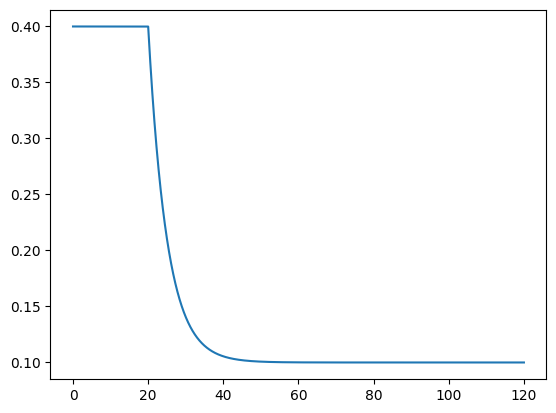

In [4]:
'''Functional beta'''
def beta(t,beta_par):

    if(t<beta_par['T']):
        return beta_par['beta_0']

    return beta_par['beta_inf'] + (beta_par['beta_0'] - beta_par['beta_inf']) * np.exp(-(t-beta_par['T'])/beta_par['tau'])
    
    
beta_par = {'beta_0':0.4,'beta_inf':0.1,'T':20,'tau':5} 
beta_ts = np.linspace(0,120,120000)

betas = []
for i in range(np.shape(beta_ts)[0]):
    betas.append(beta(beta_ts[i],beta_par))

plt.plot(beta_ts,np.array(betas))

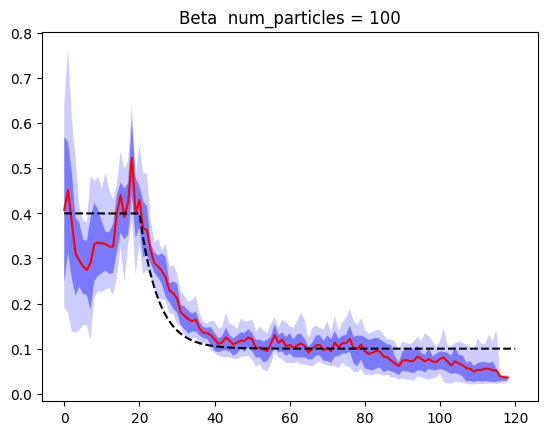

In [5]:
'''plotting the infection rate beta by propagating the particles using epymorph'''

pd.DataFrame(output['beta_values']).to_csv('./data/average_beta.csv')
pd.DataFrame(output['beta_quantiles']).to_csv('./data/beta_quantiles.csv')

pf_beta = pd.read_csv('./data/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta, 0, 1)
beta_quantiles = pd.read_csv('./data/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles, 0, 1)

plt.title(f"Beta  num_particles = {pf_sim.num_particles}")
plt.fill_between(np.arange(0, 119), beta_quantiles[:, 3], beta_quantiles[:, 22 - 3], facecolor='blue', zorder=10, alpha=0.2)
plt.fill_between(np.arange(0, 119), beta_quantiles[:, 6], beta_quantiles[:, 22 - 6], facecolor='blue', zorder=11, alpha=0.4)
plt.plot(pf_beta, color="red", zorder=12)
plt.plot(beta_ts,np.array(betas),linestyle="dashed",zorder=12,color='black')
plt.savefig('Beta_epymorph.png')
plt.show()


In [9]:
# Define the static simulation parameters
static_params = {
    'eta': 0.143,
    'gamma': 0.071,
    'µ': 0.004,
    'q': 0.1
}

# Define the dynamic parameters
dynamic_params = {'beta': [0.1, 0.8]}  # Specify dynamic parameters to estimate

In [10]:
model_params = Parameters(num_population=100_000, num_particles=100, initial_seed=5)

In [5]:
config = {
    'filter': ParticleFilter,
    'likelihood_fn': PoissonLikelihood,
    #'data': 'D:/Sachin/New_EpiMorph/Epymorph/epymorph/calvetti_sim_data_protocol_A.csv',
    'model_params': model_params, 
    'p_estimate' : ['Rate of Infection']
    #'static_params': static_params,
    #'dynamic_params': dynamic_params
}

In [6]:
# Create and run the filtering system
filtering_system = Filtering(config)
resampled_particles, weights, beta_quantiles, beta_values = filtering_system.run()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

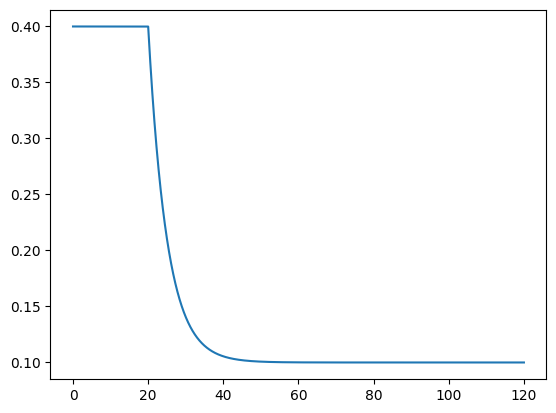

In [5]:
'''Functional beta'''
def beta(t,beta_par):

    if(t<beta_par['T']):
        return beta_par['beta_0']

    return beta_par['beta_inf'] + (beta_par['beta_0'] - beta_par['beta_inf']) * np.exp(-(t-beta_par['T'])/beta_par['tau'])
    
    
beta_par = {'beta_0':0.4,'beta_inf':0.1,'T':20,'tau':5} 
beta_ts = np.linspace(0,120,120000)

betas = []
for i in range(np.shape(beta_ts)[0]):
    betas.append(beta(beta_ts[i],beta_par))

plt.plot(beta_ts,np.array(betas))

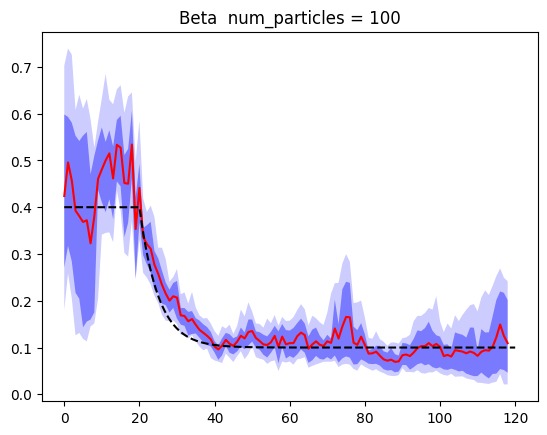

In [8]:
'''plotting the infection rate beta by propagating the particles using epymorph'''

pd.DataFrame(beta_values).to_csv('./data/average_beta.csv')
pd.DataFrame(beta_quantiles).to_csv('./data/beta_quantiles.csv')

pf_beta = pd.read_csv('./data/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta, 0, 1)
beta_quantiles = pd.read_csv('./data/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles, 0, 1)

plt.title(f"Beta  num_particles = {model_params.num_particles}")
plt.fill_between(np.arange(0, 119), beta_quantiles[:, 3], beta_quantiles[:, 22 - 3], facecolor='blue', zorder=10, alpha=0.2)
plt.fill_between(np.arange(0, 119), beta_quantiles[:, 6], beta_quantiles[:, 22 - 6], facecolor='blue', zorder=11, alpha=0.4)
plt.plot(pf_beta, color="red", zorder=12)
plt.plot(beta_ts,np.array(betas),linestyle="dashed",zorder=12,color='black')
plt.savefig('Beta_epymorph.png')
plt.show()
